# PREDIKSI HARGA RUMAH DIDAERAH JABODETABEK


# PROYEK SAINS DATA

Pada kali ini saya mengambil data dari website yang ada pada https://www.kaggle.com/datasets/wisnuanggara/daftar-harga-rumah yang mana selanjutnya akan di uji sebagai tugas dari mata kuliah proyek sains data. Berikut ini adalah langkah langkah untuk mengerjakan tugas ini.

# 1. DATA UNDERSTANDING

Untuk yang pertama kali ini saya melakukan klasifikasi untuk prediksi mengenai harga rumah yang ada di daerah Jabodetabek dengan tujuan untuk memprediksi untuk menentukan harga yang akurat dari sebuah rumah yang ingin dijual yang berada di daerah Jabodetabek.

Langkah pertama untuk yaitu mengumpulkan data yang ingin di prediksi, yang mana disini saya mengambil data dari www.kaggle.com sehingga perlu ditarik lagi datanya dari sumber tersebut. Data ini memiliki 6 fitur yaitu : 1. No 2. Harga 3. LB 4. LT 5. KT 6. KM 7. GRS

In [3]:
import pandas as pd

data = {
    'no': [1, 2, 3, 4, 5, 6],
    'Fitur': ['Harga', 'LB', 'LT', 'KT', 'KM', 'GRS'],
    'Tipe data': ['numeric', 'numeric', 'numeric', 'numeric', 'numeric', 'numeric'],
    'Deskripsi': ['Harga Rumah', 'Luas Bangunan', 'Luas Tanah', 'Jumlah Kamar Tidur', 'Jumlah Kamar Mandi', 'Garasi']
}

df = pd.DataFrame(data)

# Atur style teks rata kiri pada kolom "deskripsi"
df_styled = df.style.set_properties(**{'text-align': 'left'})

# Tampilkan DataFrame dengan style
df_styled

,no,Fitur,Tipe data,Deskripsi
0,1,Harga,numeric,Harga Rumah
1,2,LB,numeric,Luas Bangunan
2,3,LT,numeric,Luas Tanah
3,4,KT,numeric,Jumlah Kamar Tidur
4,5,KM,numeric,Jumlah Kamar Mandi
5,6,GRS,numeric,Garasi


Berikut Merupakan Hasil dataset yang saya didapatkan dari Website www.Kaggle.com

In [4]:
import pandas as pd

df = pd.read_csv('datarumah.csv')

# Create a Styler object
df_styled = df.style

# Add outer border to the table
df_styled.set_table_styles([{'selector': 'table', 'props': [('border', '2px solid black')]}]).set_properties(**{'text-align': 'left'})

# Display the first 10 rows of the styled DataFrame
# Call .head() on the DataFrame first, THEN apply styling and hide the index
df.head(15).style.set_table_styles([{'selector': 'table', 'props': [('border', '2px solid black')]}]).set_properties(**{'text-align': 'left'}).hide(axis="index")

NO,HARGA,LB,LT,KT,KM,GRS
1,3800000000,220,220,3,3,0
2,4600000000,180,137,4,3,2
3,3000000000,267,250,4,4,4
4,430000000,40,25,2,2,0
5,9000000000,400,355,6,5,3
6,4970000000,300,154,5,3,3
7,2600000000,120,150,3,2,1
8,10500000000,350,247,4,4,0
9,3250000000,125,90,3,3,0
10,4500000000,250,96,5,4,1


Untuk mengecek tipe data setiap baris

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   NO      600 non-null    int64
 1   HARGA   600 non-null    int64
 2   LB      600 non-null    int64
 3   LT      600 non-null    int64
 4   KT      600 non-null    int64
 5   KM      600 non-null    int64
 6   GRS     600 non-null    int64
dtypes: int64(7)
memory usage: 32.9 KB


selanjutnya, untuk mengetahui jumlah baris dan kolom yang terdapat pada dataset, berikut adalah cara untuk menampilkan jumlah baris dan kolom

In [6]:
import numpy as np  # Import library numpy
import pandas as pd  # Import library pandas
df = pd.read_csv('datarumah.csv')  # Membaca file dataset.csv dan menyimpannya ke dalam DataFrame df
df.shape  # Menampilkan bentuk (jumlah baris dan kolom) dari DataFrame df

(600, 7)

Dapat dilihat dari Hasil diatas terdapat 600 Baris dan 7 Kolom

# MENENTUKAN MISSING VALUE

Missing Value adalah hilangnya beberapa data yang telah diperoleh. Menangani missing value dengan tepat sangat penting untuk memastikan integritas dan akurasi analisis data. Pada dataset Data rumah selanjutnya dilakukan pengecekan missing value sebagai berikut:

In [7]:
import numpy as np
import pandas as np
df = pd.read_csv('datarumah.csv')
df.isnull().sum()

,0
NO,0
HARGA,0
LB,0
LT,0
KT,0
KM,0
GRS,0


KESIMPULAN: dapat dilihat dari hasil tersebut bahwa tidak terdapat missing value dalam dataset sehingga tidak dibutuhkan proses lebih lanjut untuk penanganan missing value

# EXPLORASI DATA

Selanjutnya melakukan explorasi data dengan rincian sebagai berikut:

**df.describe** hanya digunakan untuk tipe data numeric

**Count:** Jumlah data dalam setiap kolom.

**Mean:** Rata-rata nilai dalam setiap kolom.

**Std (Standar Deviation)**: Standar Deviasi dari nilai dalam setiap kelom.

**Min:** Nilai minimum dalam setiap kolom.

**25%, 50%, 75% (quartiles):** Nilai-nilai kuartil yang membagi data menjadi empat bagian sama besar. Kuartil ke-50 adalah median.

**Max:**Nilai maksimum dalam setiap kolom.

Berikut ini merupakann program untuk explorasi data numerik:

In [8]:
import numpy as np  # Import library numpy
import pandas as pd  # Import library pandas
df = pd.read_csv('datarumah.csv')  # Membaca file dataset.csv
df.describe() #hanya berlaku untuk type data numerik

,NO,HARGA,LB,LT,KT,KM,GRS
count,600.000000,6.000000e+02,600.000000,600.000000,600.000000,600.000000,600.000000
mean,300.500000,7.587356e+09,272.343333,235.960000,4.703333,3.623333,1.888333
std,173.349358,7.569145e+09,173.305116,183.422513,1.597783,1.398111,1.378053
min,1.000000,4.300000e+08,40.000000,25.000000,2.000000,1.000000,0.000000
25%,150.750000,3.500000e+09,160.000000,130.000000,4.000000,3.000000,1.000000
50%,300.500000,4.925000e+09,216.000000,161.500000,5.000000,3.000000,2.000000
75%,450.250000,8.750000e+09,340.000000,270.000000,5.000000,4.000000,2.000000
max,600.000000,6.500000e+10,1126.000000,1400.000000,10.000000,10.000000,10.000000


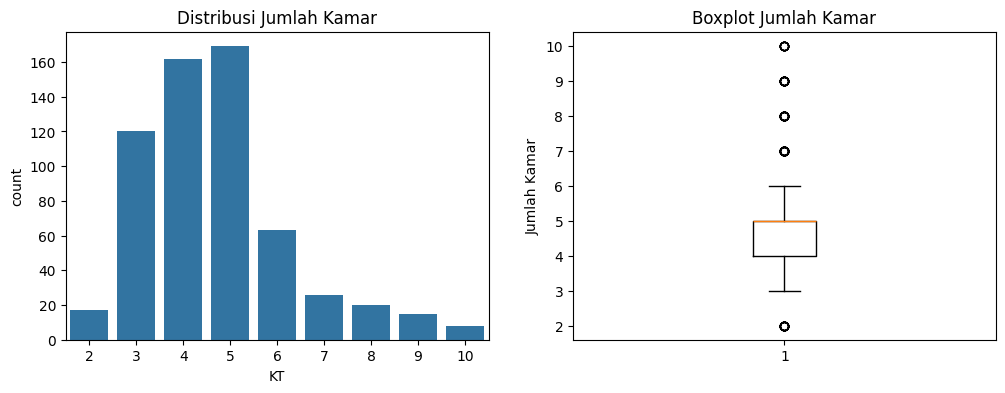

In [9]:
#analisis kamar
#melihat distribusi dari kamar
# Membuat figure
import matplotlib.pyplot as plt  # Import matplotlib.pyplot as plt
import seaborn as sns # Import seaborn as sns

f = plt.figure(figsize=(12, 4))

# Plot pertama: Count plot distribusi kamar
f.add_subplot(1, 2, 1)
sns.countplot(x='KT', data=df)
plt.title('Distribusi Jumlah Kamar')

# Plot kedua: Boxplot distribusi kamar
f.add_subplot(1, 2, 2)
plt.boxplot(df['KT'])
plt.title('Boxplot Jumlah Kamar')
plt.ylabel('Jumlah Kamar')

# Tampilkan plot
plt.show()

*   Dapat dilihat bahwa sebagian besar jumlah kamar tiddur itu di angka 4 dan 5
*   Data memiliki banyak outlier





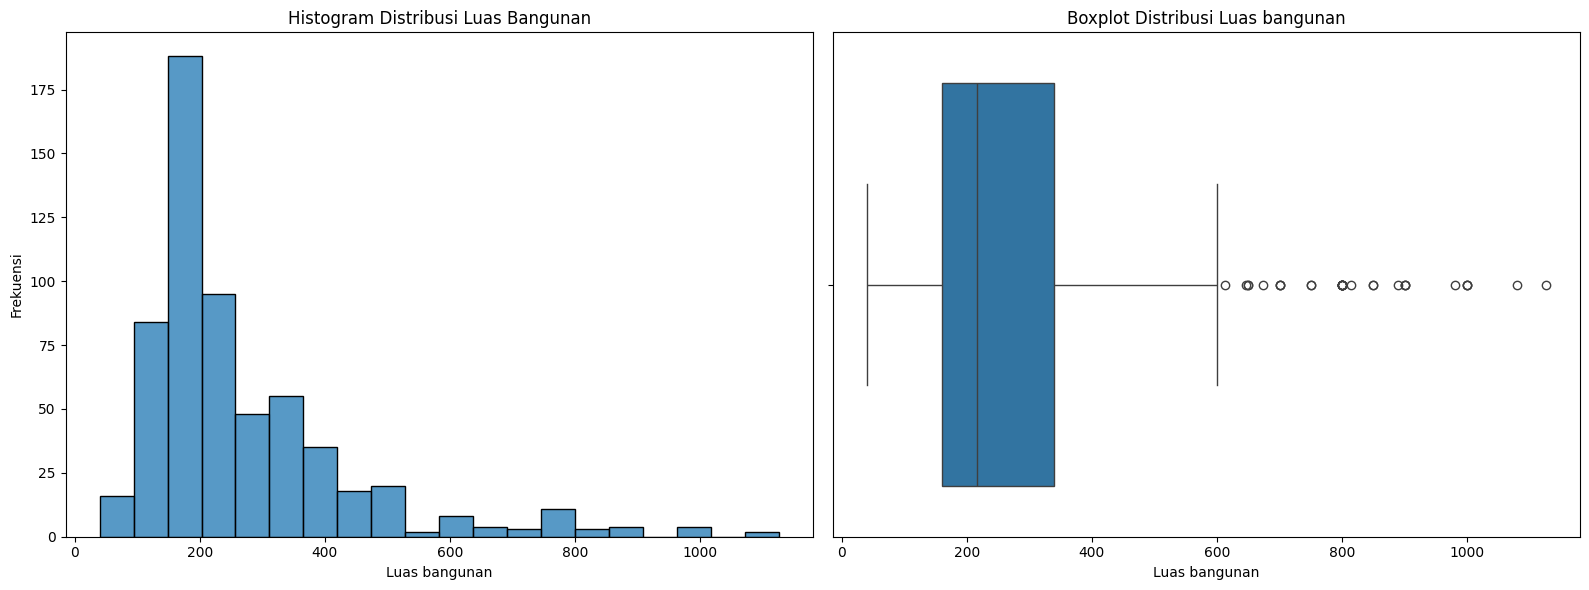

In [10]:
# Membuat figure dan axes dengan 1 baris dan 2 kolom
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot pertama: Histogram distribusi luas bangunan
sns.histplot(df['LB'], bins=20, kde=False, ax=axes[0])
axes[0].set_title('Histogram Distribusi Luas Bangunan')
axes[0].set_xlabel('Luas bangunan')
axes[0].set_ylabel('Frekuensi')

# Plot kedua: Boxplot distribusi luas bangunan
sns.boxplot(x=df['LB'], ax=axes[1])
axes[1].set_title('Boxplot Distribusi Luas bangunan')
axes[1].set_xlabel('Luas bangunan')

# Mengatur layout agar lebih rapi
plt.tight_layout()
plt.show()

*   Histogram menunjukkan bahwa jumlah luas bangunan dengan luas sekitar 150 sampai 200 lebih banyak dibandingkan dengan luas lainnya
*   Terdapat outlier dengan nilai diatas 500


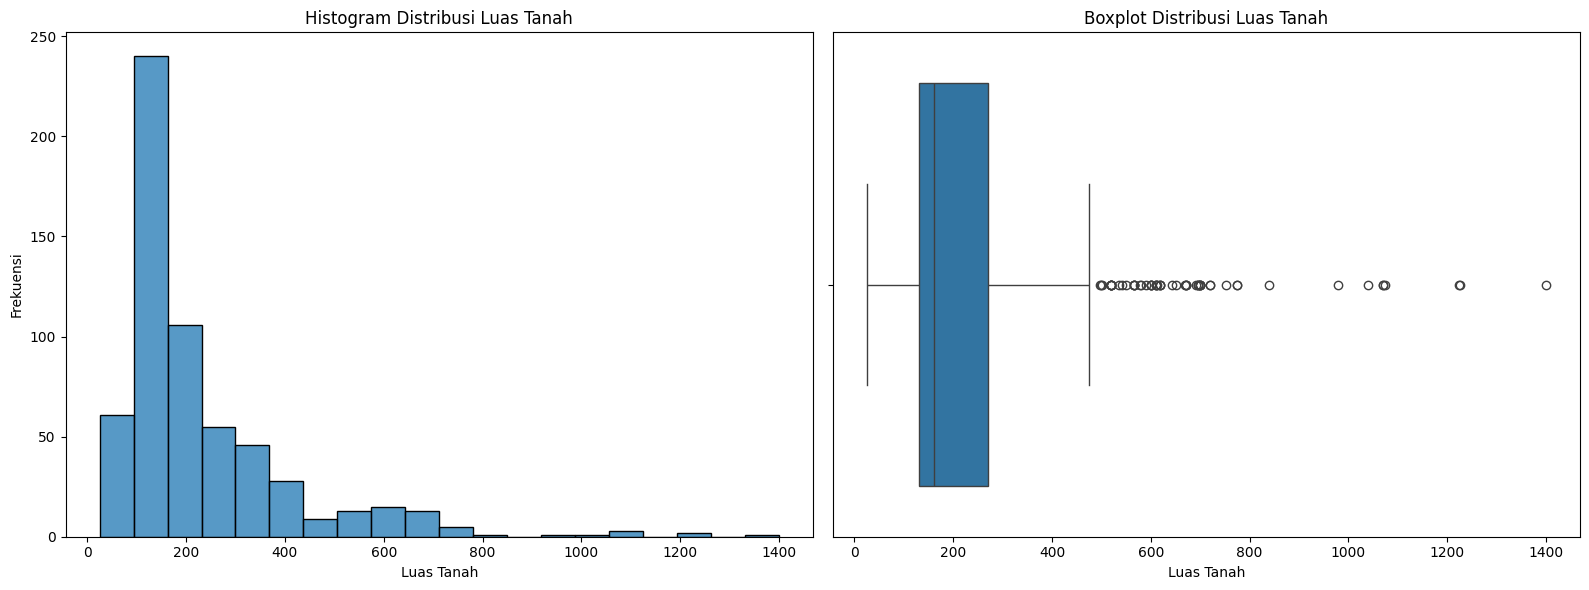

In [11]:
# Membuat figure dan axes dengan 1 baris dan 2 kolom
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot pertama: Histogram distribusi luas lahan
sns.histplot(df['LT'], bins=20, kde=False, ax=axes[0])
axes[0].set_title('Histogram Distribusi Luas Tanah')
axes[0].set_xlabel('Luas Tanah')
axes[0].set_ylabel('Frekuensi')

# Plot kedua: Boxplot distribusi luas lahan
sns.boxplot(x=df['LT'], ax=axes[1])
axes[1].set_title('Boxplot Distribusi Luas Tanah')
axes[1].set_xlabel('Luas Tanah')

# Mengatur layout agar lebih rapi
plt.tight_layout()
plt.show()

*   Sebagian luas tanah berada di bawah 150 meter persegi, dengan beberapa luas lahan diatas 400 meter persegi.
*   Boxplot menunjukkan bahwa terdapat outlier diatas 500 meter persegi.



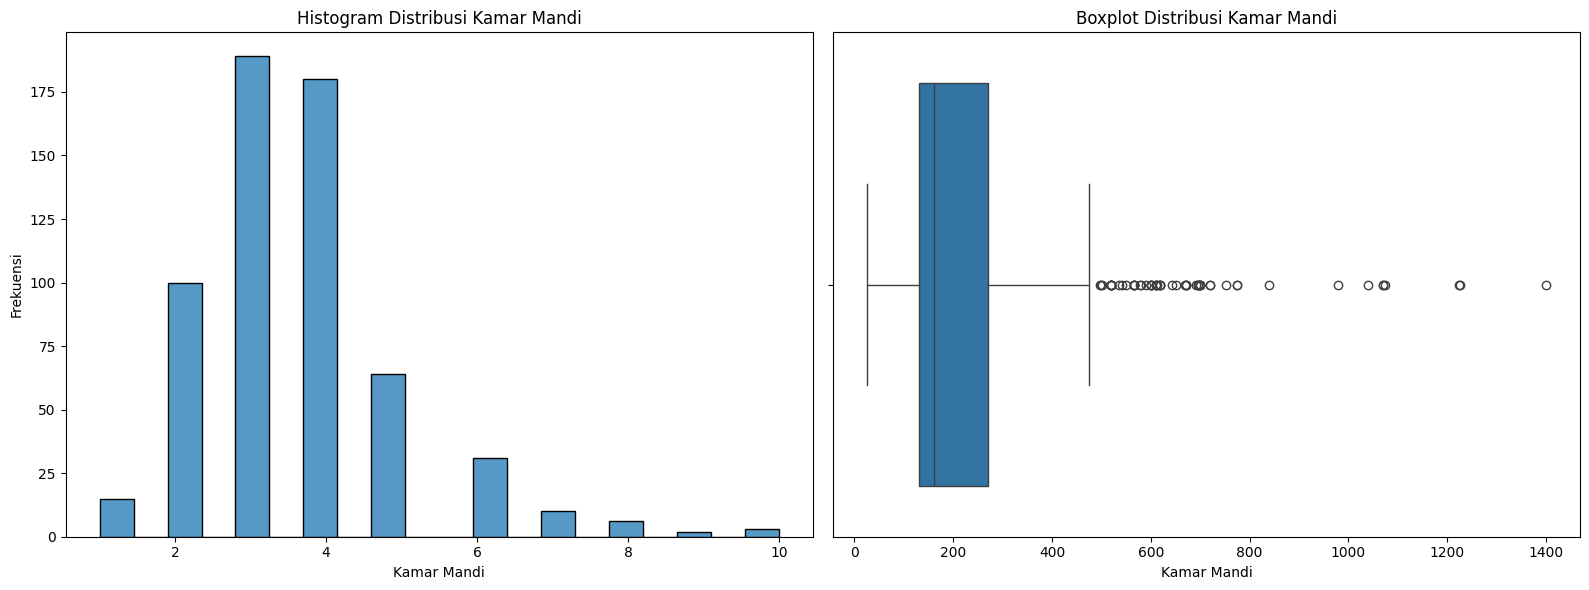

In [12]:
# Membuat figure dan axes dengan 1 baris dan 2 kolom
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot pertama: Histogram distribusi luas lahan
sns.histplot(df['KM'], bins=20, kde=False, ax=axes[0])
axes[0].set_title('Histogram Distribusi Kamar Mandi')
axes[0].set_xlabel('Kamar Mandi')
axes[0].set_ylabel('Frekuensi')

# Plot kedua: Boxplot distribusi luas lahan
sns.boxplot(x=df['LT'], ax=axes[1])
axes[1].set_title('Boxplot Distribusi Kamar Mandi')
axes[1].set_xlabel('Kamar Mandi')

# Mengatur layout agar lebih rapi
plt.tight_layout()
plt.show()

*   Dapat dilihat bahwa sebagian besar jumlah kamar mandi itu di angka 3 dan 4
*   Data memiliki banyak outlier





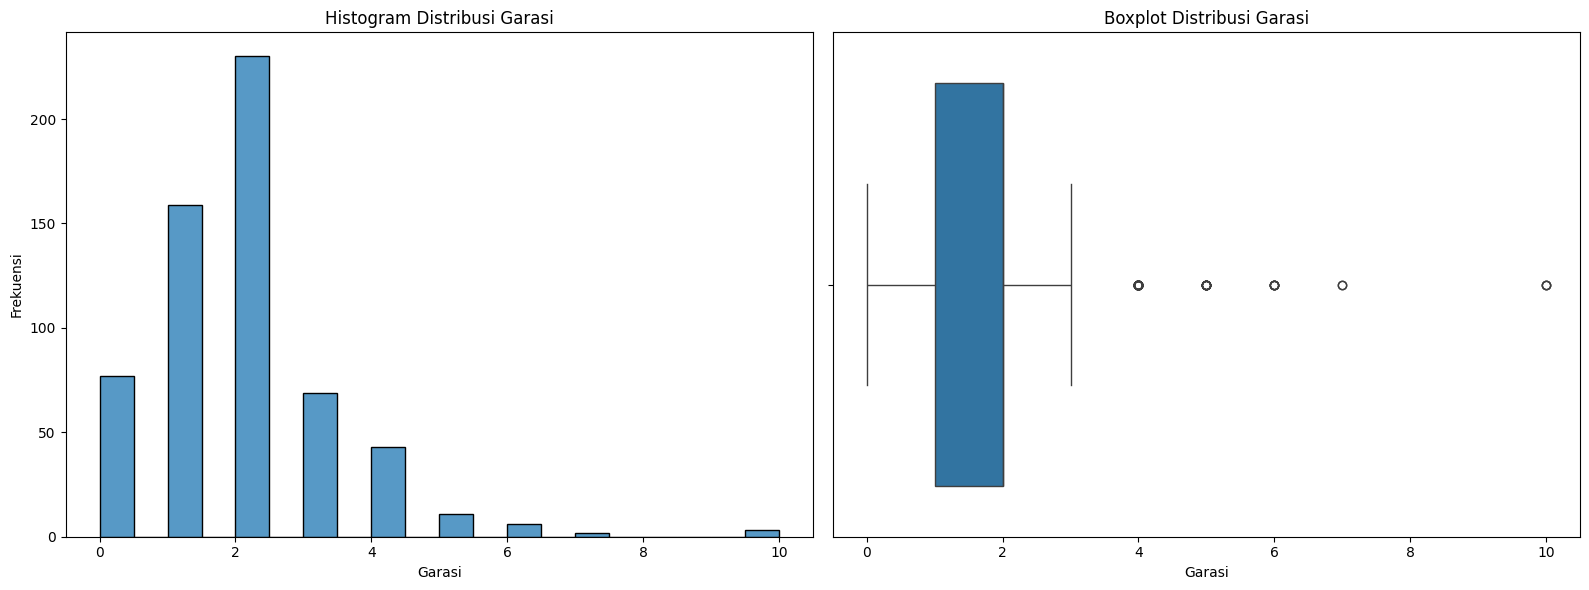

In [13]:
# Membuat figure dan axes dengan 1 baris dan 2 kolom
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot pertama: Histogram distribusi luas lahan
sns.histplot(df['GRS'], bins=20, kde=False, ax=axes[0])
axes[0].set_title('Histogram Distribusi Garasi')
axes[0].set_xlabel('Garasi')
axes[0].set_ylabel('Frekuensi')

# Plot kedua: Boxplot distribusi luas lahan
sns.boxplot(x=df['GRS'], ax=axes[1])
axes[1].set_title('Boxplot Distribusi Garasi')
axes[1].set_xlabel('Garasi')

# Mengatur layout agar lebih rapi
plt.tight_layout()
plt.show()

*   Dapat dilihat bahwa sebagian besar jumlah kamar mandi itu di angka 1 dan 2
*   Data memiliki banyak outlier





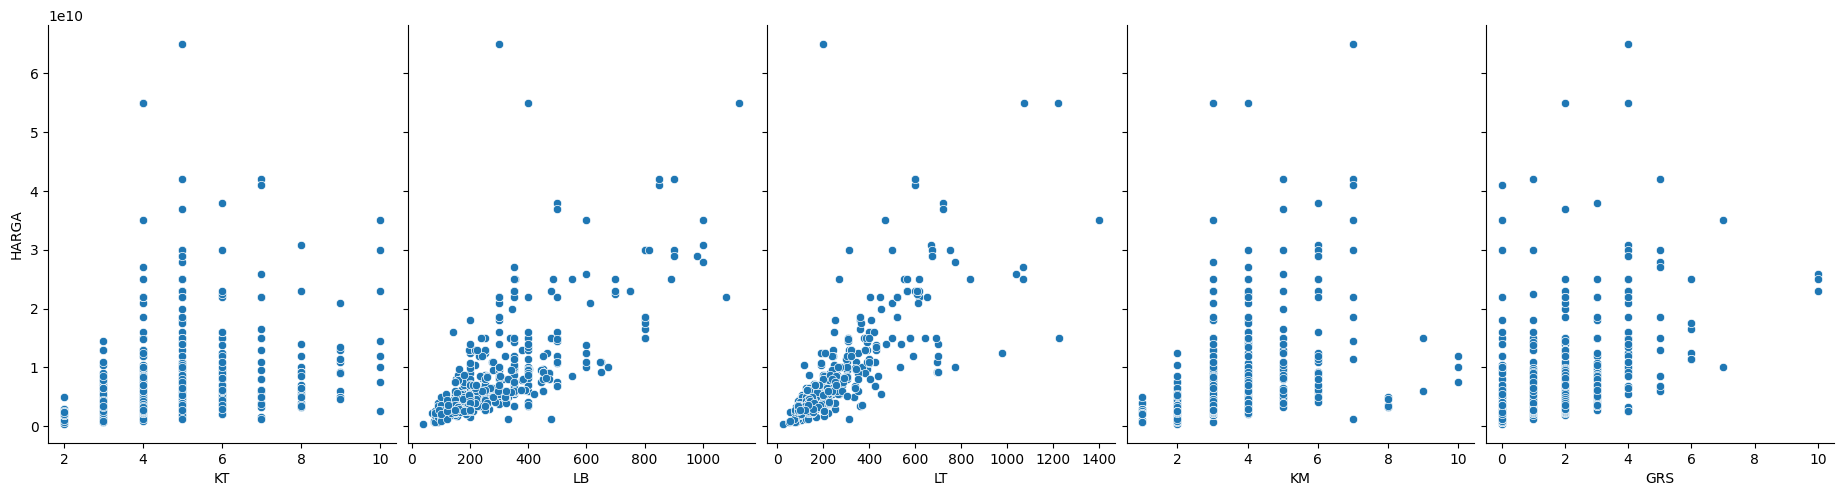

In [14]:
#Bivariete anaysis antara independent variable dan dependent variable
#melihat hubungan antara independent dan dependent menggunakan pairplot
df = pd.read_csv('datarumah.csv')
sns.pairplot(data=df, x_vars=['KT', 'LB', 'LT', 'KM', 'GRS'], y_vars=['HARGA'], height=5, aspect=0.75)
plt.show()

*   Dapat disimpulkan bahwa terdapat hubungan yang kuat antara luas_bangunan, luas tanah, kamar tidur dan harga, karena titik-titiknya cenderung menyebar mengikuti garis diagonal ke atas.
*   Jika titik-titik lebih terkonsentrasi, artinya hubungannya lebih kuat.



In [15]:
#mengetahui nilai korelasi dari independent variable dan dependent variable
correlation_matrix = df.corr().round(2)  # Membulatkan nilai korelasi hingga 2 desimal
correlation_matrix.style.background_gradient(cmap='coolwarm')  # Menggunakan warna untuk menunjukkan nilai korelasi

,NO,HARGA,LB,LT,KT,KM,GRS
NO,1.000000,0.040000,0.040000,0.050000,-0.010000,-0.020000,0.120000
HARGA,0.040000,1.000000,0.720000,0.780000,0.290000,0.370000,0.420000
LB,0.040000,0.720000,1.000000,0.720000,0.460000,0.520000,0.440000
LT,0.050000,0.780000,0.720000,1.000000,0.390000,0.330000,0.450000
KT,-0.010000,0.290000,0.460000,0.390000,1.000000,0.660000,0.250000
KM,-0.020000,0.370000,0.520000,0.330000,0.660000,1.000000,0.310000
GRS,0.120000,0.420000,0.440000,0.450000,0.250000,0.310000,1.000000


*   Harga dan Luas Tanah memiliki korelasi positif yang kuat. Artinya, semakin luas tanah, maka harga rumah cenderung semakin mahal.
*   Harga dan Luas Bangunan memiliki korelasi positif yang sedang. Artinya, semakin luas bangunan, maka harga rumah cenderung semakin mahal, tetapi tidak sekuat korelasi antara harga dan luas lahan.
*   Harga dan Kamar Mandi memiliki korelasi positif yang tidak terlalu lemah. Artinya, semakin banyak kamar, maka harga rumah cenderung semakin mahal, namun korelasinya tidak terlalu rendah.


*   harga dan Kamar Tidur Memiliki korelasi positif yang lumayan lemah, yang mana semakin banyak kamar tidur, maka harga semakin mahal, namun korelasinya lumayan lemah
*   Harga dan Kamar Garasi memiliki korelasi positif yang sangat lemah yang artinya jika semakin banyak garasi harga rumah cenderung lumayan mahal, namun korelasinya sangat rendah


**Kesimpulan **: Luas Tahan dan Luas bangunan memiliki pengaruh paling kuat terhadap harga rumah.
Jumlah kamar mandi, kamar tidur dan garasi memiliki pengaruh yang relatif kecil terhadap harga rumah.




# MENENTUKAN OUTLIER

Outlier adalah data yang berbeda secara signifikan dari data lain dalam sebuah set data. Mereka bisa menjadi nilai yang sangat kecil atau sangat besar dibandingkan dengan nilai rata-rata atau mayoritas data lainnya.

LOF (Local Outlier Factor) adalah metode statistik yang digunakan untuk mendeteksi outlier dalam sebuah set data. Metode ini menghitung seberapa jauh suatu titik data berada dari tetangga-tetangganya dalam konteks data tersebut. LOF memberikan nilai yang menggambarkan seberapa "aneh" atau tidak biasa suatu titik data dibandingkan dengan tetangganya.

Berikut merupakan implementasi dari perhitungan LOF dengan menggunakan library Scikit Learn.

In [16]:
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor

# Membaca dataset dari file CSV
X = pd.read_csv("datarumah.csv")

# Membuat objek LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=5, contamination=0.1)

# Prediksi status outlier
y_pred = lof.fit_predict(X)

# Mencetak tabel prediksi status outlier
print("Predicted table:", y_pred)

# Mencetak nilai LOF yang bersifat negatif
print("Negative LOF scores:", -lof.negative_outlier_factor_)

# Cari indeks dari nilai -1 dalam array y_pred
outlier_indices = [index for index, value in enumerate(y_pred) if value == -1]

# Cetak indeks dari nilai -1 untuk mengetahui data ke berapa yang dianggap sebagai outlier
print("Data outlier terdapat pada indeks:", outlier_indices)

# Kesimpulan
print("KESIMPULAN: Disini asumsinya adalah 0.1 (10%) dari seluruh data dianggap outlier. Output -1 adalah ciri-ciri dari outlier. Dan output yang menunjukkan angka-angka desimal yang lebih tinggi dari angka-angka desimal lainnya merupakan outliernya. Hal ini ditunjukkan pada indeks ke",outlier_indices)

Predicted table: [ 1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1 -1  1  1  1 -1  1  1 -1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1 -1  1  1  1 -1  1  1  1  1  1  1  1  1 -1  1
  1  1  1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1 -1  1
  1  1  1  1  1  1  1 -1  1  1  1  1 -1  1 -1 -1  1  1 -1  1  1  1 -1  1
  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1
  1  1 -1  1 -1  1  1  1  1  1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1 -1  1 -1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1 -1  1  1 -1  1 -1  1  1  1  1  1  1  1  1
  1 -1  1 -1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1 -1  1  1
  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1
  1  1  1  1 -1  1  1  1  1  1  1  1 -1  1  1  1  1 -1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1 

Dapat disimpulkan Disini asumsinya adalah 0.1 (10%) dari seluruh data dianggap outlier. Output -1 adalah ciri-ciri dari outlier. Dan output yang menunjukkan angka-angka desimal yang lebih tinggi dari angka-angka desimal lainnya merupakan outliernya. Hal ini ditunjukkan pada indeks ke [5, 55, 59, 62, 63, 81, 85, 94, 99, 100, 114, 118, 127, 132, 134, 135, 138, 142, 150, 164, 170, 172, 178, 179, 195, 197, 199, 226, 229, 231, 241, 243, 254, 261, 265, 287, 292, 300, 305, 323, 325, 335, 363, 378, 388, 390, 393, 414, 428, 430, 445, 458, 488, 489, 521, 532, 539, 541, 561, 568]

# HASIL HITUNG OUTLIER

In [17]:
# Hitung jumlah total sampel
total_samples = len(X)

# Hitung jumlah sampel yang dianggap sebagai outlier
outlier_samples = sum(1 for value in y_pred if value == -1)

# Hitung persentase sampel yang dianggap outlier
outlier_percentage = (outlier_samples / total_samples) * 100

# Cetak hasil perhitungan
print(f"Total samples: {total_samples}")
print(f"Outlier samples: {outlier_samples}")
print(f"Outlier percentage: {outlier_percentage:.2f}%")


Total samples: 600
Outlier samples: 60
Outlier percentage: 10.00%


# DATA PROCESSING

Preprocessing adalah tahapan dalam proses analisis data yang melibatkan persiapan dan pembersihan data mentah agar siap untuk dianalisis atau dimasukkan ke dalam model. Langkah-langkah ini penting untuk memastikan bahwa data berada dalam format yang sesuai dan bebas dari kesalahan yang bisa mempengaruhi hasil analisis.

# MENGHAPUS OUTLIER

Keberadaan outlier dapat mempengaruhi hasil analisis data, sehingga perlu untuk dilakukan  deteksi dan penghapusan outlier. Berikut merupakan program untuk menghapus outlier:

In [18]:
# Mengimpor kelas LocalOutlierFactor dari modul neighbors di pustaka Scikit-learn (sklearn).
from sklearn.neighbors import LocalOutlierFactor

# Membaca dataset dari file CSV ("dataset.csv") ke dalam DataFrame X menggunakan Pandas.
X = pd.read_csv("datarumah.csv")

# Membuat objek LocalOutlierFactor (LOF).
# n_neighbors=5 menentukan jumlah tetangga yang akan digunakan dalam perhitungan LOF.
# contamination=0.1 menentukan tingkat kontaminasi atau persentase outlier yang diharapkan dalam data.
lof = LocalOutlierFactor(n_neighbors=5, contamination=0.1)

# Menggunakan metode fit_predict() dari objek LOF untuk menentukan status outlier (outlier atau bukan) untuk setiap sampel dalam data.
# Hasilnya akan berupa array yang berisi prediksi status outlier untuk setiap sampel.
y_pred = lof.fit_predict(X)

# Cari indeks dari nilai -1 dalam array y_pred
outlier_indices = [index for index, value in enumerate(y_pred) if value == -1]

# Cetak indeks dari nilai -1 untuk mengetahui data ke berapa yang dianggap sebagai outlier
print("Data outlier terdapat pada indeks:", outlier_indices)

# Menghapus baris yang mengandung outlier dari DataFrame
X_cleaned = X.drop(outlier_indices)

# Menyimpan DataFrame yang telah dibersihkan ke file CSV baru
X_cleaned.to_csv("penjualan rumah_tanpa_outlier.csv", index=False)

# Menampilkan jumlah baris asli dan jumlah baris setelah outlier dihapus
print("Jumlah baris asli:", len(X))
print("Jumlah baris setelah outlier dihapus:", len(X_cleaned))
print("Dataset tanpa outlier telah disimpan ke 'penjualan rumah_tanpa_outlier.csv'")

Data outlier terdapat pada indeks: [5, 55, 59, 62, 63, 81, 85, 94, 99, 100, 114, 118, 127, 132, 134, 135, 138, 142, 150, 164, 170, 172, 178, 179, 195, 197, 199, 226, 229, 231, 241, 243, 254, 261, 265, 287, 292, 300, 305, 323, 325, 335, 363, 378, 388, 390, 393, 414, 428, 430, 445, 458, 488, 489, 521, 532, 539, 541, 561, 568]
Jumlah baris asli: 600
Jumlah baris setelah outlier dihapus: 540
Dataset tanpa outlier telah disimpan ke 'penjualan rumah_tanpa_outlier.csv'


Kesimpulan : Kode ini membaca dataset, mendeteksi outlier menggunakan metode Local Outlier Factor, lalu menghapus baris yang mengandung outlier, dan menyimpan dataset yang telah dibersihkan ke file baru yang bernama penjualan rumah_tanpa_outlier.csv. Jumlah baris asli adalah 600 baris, setelah outlier dihapus menjadi 540 baris.

# PEMBAGIAN DATA

In [19]:
#membuat variabel x dan y
x = df.drop('HARGA', axis=1)
y = df['HARGA']

In [20]:
#split data menjadi training dan testing
# x adalah DataFrame untuk variabel independen dan y adalah Series untuk variabel dependen
from sklearn.model_selection import train_test_split
x = df[['KT', 'LB', 'LT', 'KM', 'GRS']]  #variabel independen
y = df['HARGA']  # variabel dependen
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

In [21]:
#cek shape dari data training dan testing
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(480, 5)
(120, 5)
(480,)
(120,)


# Regresi Linier

In [28]:
#object regresi linear
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [29]:
lin_reg.fit(x_train, y_train)

LinearRegression()

In [30]:
print(lin_reg.coef_)
print(lin_reg.intercept_)

[-7.76438103e+08  1.36830331e+07  2.29232673e+07  5.84228240e+08
  2.74511676e+08]
-524815076.20986843


In [31]:
coef_dict = {
    'features': x.columns,
    'coef_value': lin_reg.coef_
}

coef_df = pd.DataFrame(coef_dict, columns=['features','coef_value'])
coef_df # Display the coef_df DataFrame instead of coef.

,features,coef_value
0,KT,-7.764381e+08
1,LB,1.368303e+07
2,LT,2.292327e+07
3,KM,5.842282e+08
4,GRS,2.745117e+08


In [32]:
y_pred = lin_reg.predict(x_test)

In [33]:
#mengetahui akurasi score menggunakan testing data yang sudah di split
lin_reg.score(x_test, y_test)

0.7605120942089245

In [35]:
lin_reg.predict([[2, 54, 48, 34, 76]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([4.04881568e+10])

# Random Forest

In [23]:
from sklearn.ensemble import RandomForestRegressor

# Membuat objek model
forest_reg = RandomForestRegressor()

# Melatih model
forest_reg.fit(x_train, y_train)


RandomForestRegressor()

In [24]:
print(forest_reg.feature_importances_)

[0.05453821 0.12755411 0.71699736 0.06826009 0.03265024]


In [25]:
coef_dict = {
    'features': x.columns,
    'importance': forest_reg.feature_importances_
}

coef_df = pd.DataFrame(coef_dict, columns=['features', 'importance'])
coef_df  # Menampilkan DataFrame coef_df


,features,importance
0,KT,0.054538
1,LB,0.127554
2,LT,0.716997
3,KM,0.068260
4,GRS,0.032650


In [26]:
#mengetahui akurasi score menggunakan testing data yang sudah di split
forest_reg.score(x_test, y_test)

0.8525862198534124

# Test Prediksi

In [27]:
forest_reg.predict([[2, 54, 48, 34, 76]])


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([6.37879665e+09])